In [2]:
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import matplotlib.colors as mcol
import astropy.units as u
import scipy.stats as sts
from astropy.coordinates import SkyCoord
from astropy.cosmology import Planck18 as cosmo
from misc import * 
import pandas as pd
from data_get import *

plt.rcParams["axes.linewidth"]  = 2
plt.rcParams["xtick.major.size"]  = 8
plt.rcParams["xtick.minor.size"]  = 3
plt.rcParams["ytick.major.size"]  = 8
plt.rcParams["ytick.minor.size"]  = 3
plt.rcParams["xtick.direction"]  = "in"
plt.rcParams["ytick.direction"]  = "in"
plt.rcParams["legend.frameon"] = 'False'
plt.rcParams.update({'font.size': 24})
plt.rcParams["mathtext.default"] = 'rm'
plt.rcParams["mathtext.fontset"] = 'cm'


In [3]:
saga = pd.read_csv('saga-dr3-tableC2.txt', sep= r'\s+')

print(saga.columns)
print(saga.shape)

Index(['#OBJID', 'HOSTID', 'PGC', 'ra', 'dec', 'rmag', 'e_rmag', 'g-r',
       'rmag-fiber', 'sb', 'ba', 'PA', 'n', 'TELNAME', 'zspec', 'logM',
       'sample'],
      dtype='object')
(75704, 17)


In [4]:
##def elvesSAT_Re(M,a=1.077,b=0.246): return a + b*M   #returns log(reff/pc)
#def elvesFLD_Re(M,a=0.665,b=0.296): return a + b*M   #returns log(reff/pc)
#def kim_Re(M,a=-1.68,b=0.239): return a + b*M
#def danieli_Re(M,a=-1.93,b=0.23): return a + b*M

rd2deg = (180*3600)/np.pi

Mr_sol = 4.65
rho = [1.077,0.246]
gamma = [-0.606,1.098]

print(np.log10(rd2deg))
def reff(mag,sfb): return np.sqrt(np.power(10,0.4*(sfb-mag))/(2*np.pi))
def sfb(mag,reff): return mag + 2.5*np.log10(2*np.pi*reff**2)
def abs_mag(M,col,g=gamma): return 2.5*(g[1]*col+g[0]-M) + Mr_sol
def Re(M,p=rho): return p[0] + p[1]*M   #returns log(reff/pc)
def app_mag(M,col,D): return abs_mag(M,col) + 5*(D+5) #needs D/Mpc

def mst_phot(sfb,col): return 1.968503937*(1.297*col +1.165 +np.log10(np.pi*rd2deg*rd2deg)-0.4*sfb)

5.314425133176459


In [5]:
zdist = cosmo.comoving_distance(saga['zspec']).value
print(zdist)

saga['reff'] = np.round(reff(saga['rmag'],saga['sb']),3)

[ 535.34468721  639.42353555  643.82455024 ... 1190.64472918 1774.87652885
 2012.90874897]


(8036, 18)


/Users/joyb/dwarf_morphology/misc.py:63: UserWarning: The following kwargs were not used by contour: 'lw'
  CS = ax_scatter.contour(H,lw=6,extent = XYext,origin='lower',colors='black')


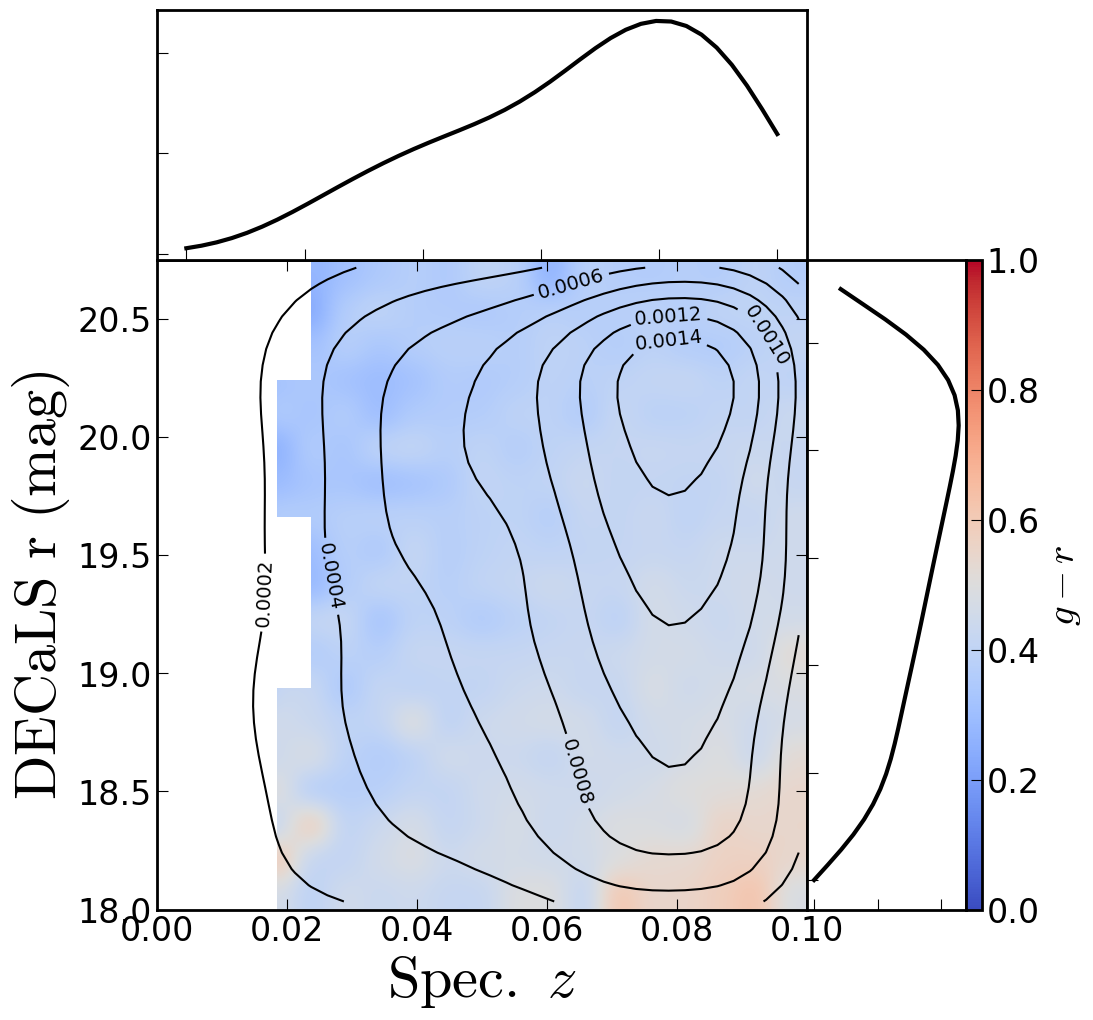

In [6]:
avail = (saga['rmag']>18)&(saga['rmag']<20.75)&(saga['zspec']<0.1)&(saga['logM']>0)&(saga['sample']==0)
sample = saga[avail]
print(sample.shape)

cmap_hists(sample['zspec'],sample['rmag'],XYext = [0,0.1,18,20.75],CMAP=mcm.coolwarm,Xlabel=r'${\rm Spec.}\ {\it z}$',Ylabel=r'$DECaLS\ r\ (mag)$',Z=sample['g-r'],Zext=[0,1],Zlabel=r'${\it g-r}$')

plt.savefig('SAGAbg_selection1.pdf',bbox_inches='tight')

In [9]:
sample.to_csv("saga_dwarfs.csv", columns=['ra','dec','zspec','logM','g-r','n','rmag','reff','sb'], index=True,index_label='ind')

1791


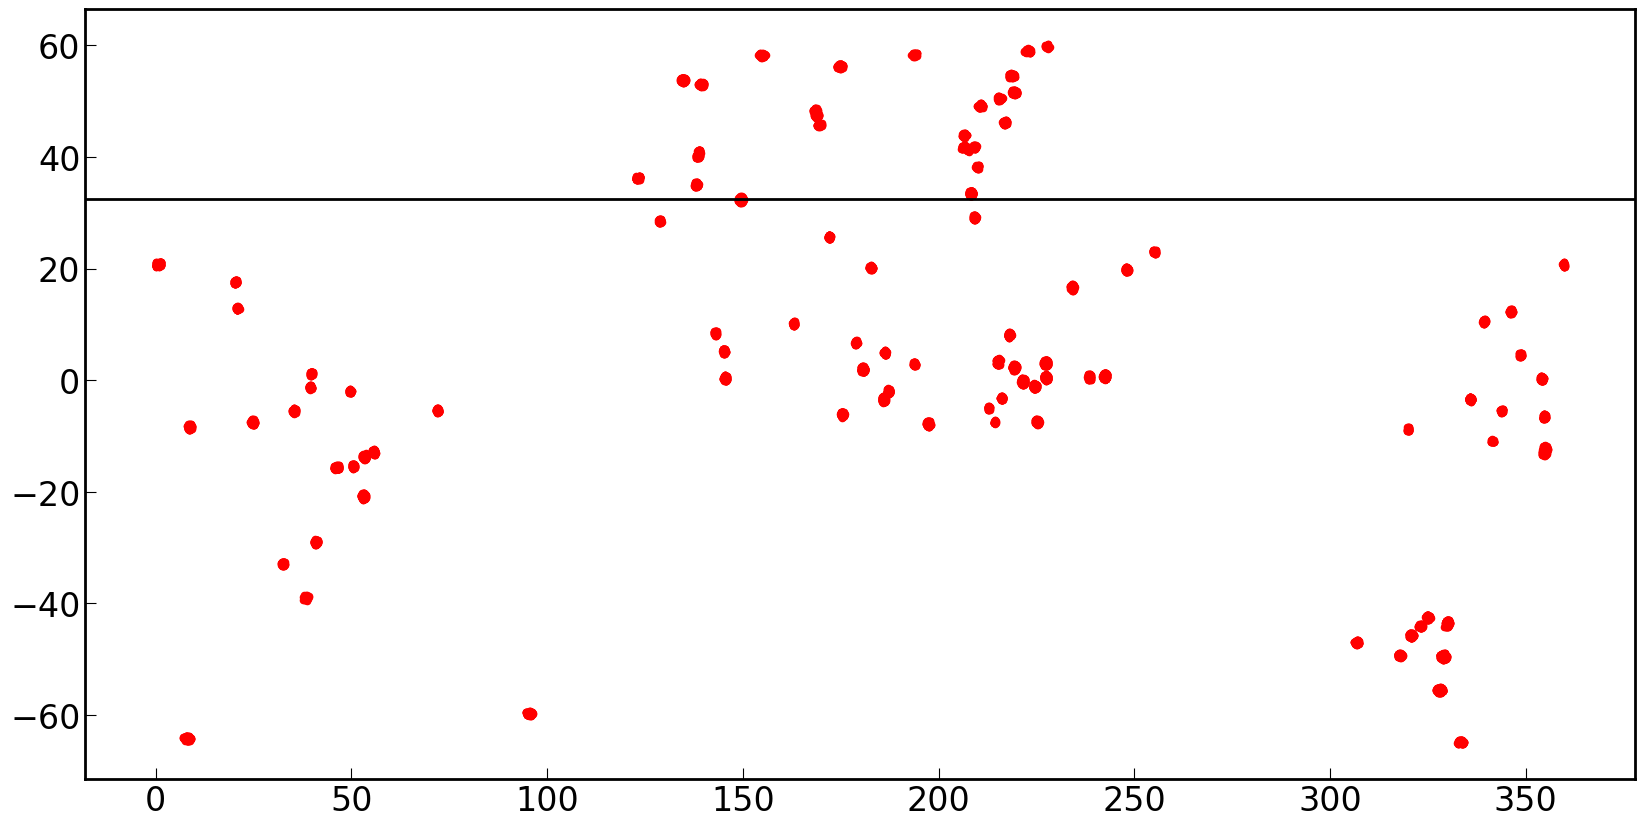

In [11]:
fig,ax=plt.subplots(figsize=(20,10))

ax.scatter(sample['ra'],sample['dec'],s=20,c='red')
ax.axhline(32.375,lw=2,color='black')
ax.set_rasterized(True)

ax.set_xlabel(r'$RA\ (deg)$',fontsize=36)
ax.set_xlabel(r'$DEC\ (deg)$',fontsize=36)

In [ ]:
scatter_hists(zspec[avail],rmag[avail],Xbins=np.linspace(0,0.1,20),Ybins=np.linspace(18,21,20),Xlabel=r'${\rm Spec.}\ {\it z}$',Ylabel=r'$DECaLS\ r\ (mag)$',Z=g_r[avail],Zbins=[0,1])

plt.colorbar(mcm.ScalarMappable(norm=mcol.Normalize(vmin=0,vmax=1), cmap=mcm.coolwarm), orientation='vertical',label=r'$DECaLS\ g-r\ (mag)$')

plt.savefig('SAGAbg_selection1.pdf',bbox_inches='tight')


In [12]:
def linear(X,A): return A[0]+A[1]*X

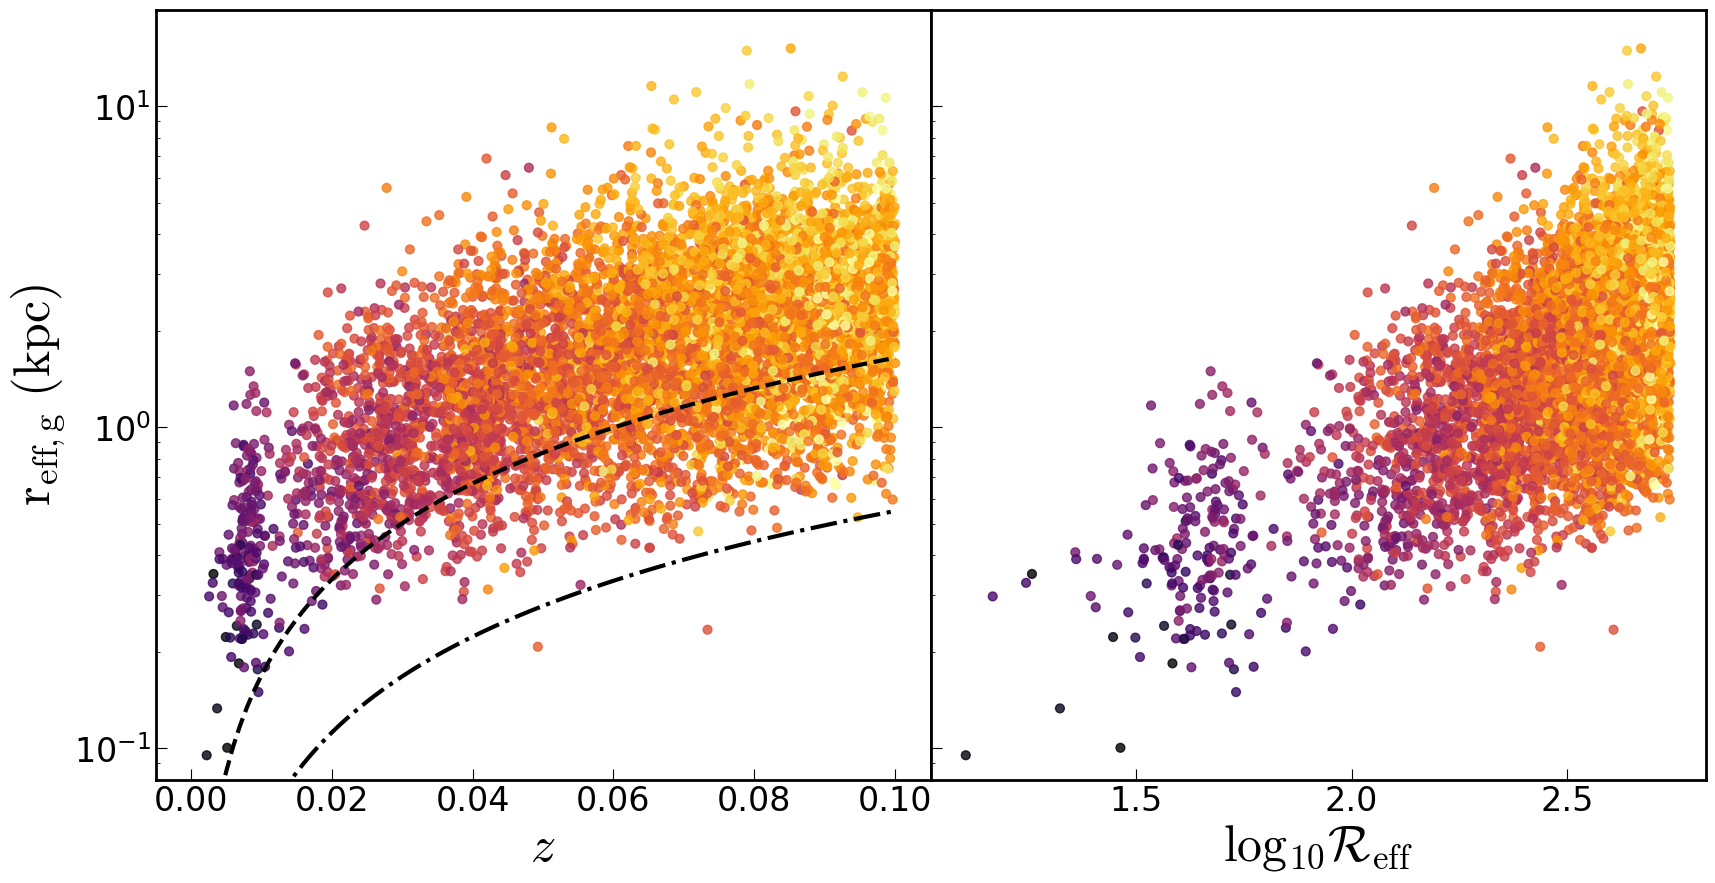

In [27]:
fig,ax=plt.subplots(1,2,figsize=(20,10),sharey=True)

#mst_arr = np.linspace(6,11,11)
zst_arr = np.linspace(0,0.1,101)
rph = 1e3*(reffr[avail]*zdist[avail].value)/rd2deg
res = 1e6*(0.262*zdist[avail].value)/rd2deg

#ax[0].scatter(zspec[avail],mst[avail],alpha=0.8,s=20,c=g_r[avail],cmap=mcm.coolwarm,vmin=0,vmax=1)
ax[0].scatter(zspec[avail],rph,alpha=0.8,s=40,c=mst[avail],cmap=mcm.inferno,vmin=6,vmax=10)
ax[1].scatter(np.log10(res),rph,alpha=0.8,s=40,c=mst[avail],cmap=mcm.inferno,vmin=6,vmax=10)

'''
res = sts.linregress(mst[avail],np.log10(rph))
p0 = [res.intercept,res.slope]
print(p0[0]+3,p0[1])

ax[1].plot(mst_arr,np.power(10,linear(mst_arr,p0)),color='black',ls='-.',lw=3)
ax[1].plot(mst_arr,np.power(10,Re(mst_arr)-3),color='black',lw=3)
ax[1].plot(mst_arr,np.power(10,Re(mst_arr,[0.665,0.296])-3),color='black',lw=3,ls='--')
#ax[1].plot(mst_arr,np.power(10,danieli_Re(mst_arr)),color='black',lw=3,ls='-.')
'''

rpix = 1e3*(0.262*cosmo.comoving_distance(zst_arr))/rd2deg
rpsf = 3*rpix

for j in range(2):
        ax[j].set_yscale('log')
        ax[j].set_ylim(bottom=0.08)

ax[0].plot(zst_arr,rpix,color='black',ls='-.',lw=3)
ax[0].plot(zst_arr,rpsf,color='black',ls='--',lw=3)

ax[0].set_xlabel(r'${\it z}$',fontsize=36)
ax[1].set_xlabel(r'${\rm log_{10}}{\mathcal{R}_{\rm eff}}$',fontsize=36)
#ax[0].set_ylabel(r'$log(M_{\ast}/M_{\odot})$',fontsize=32)
ax[0].set_ylabel(r'$r_{\rm eff,g}\ (kpc)$',fontsize=36)

#plt.colorbar(mcm.ScalarMappable(norm=mcol.Normalize(vmin=22,vmax=25), cmap=mcm.Spectral_r), ax=ax[0],orientation='horizontal',label=r'$\mu_{eff,r} \ (mag \ arcsec^{-2})$')
#plt.colorbar(mcm.ScalarMappable(norm=mcol.Normalize(vmin=22,vmax=25), cmap=mcm.Spectral_r), ax=ax[1],orientation='horizontal',label=r'$\mu_{eff,r} \ (mag \ arcsec^{-2})$')
plt.subplots_adjust(wspace=0.0)
plt.savefig('SAGAmass_distance.pdf',bbox_inches='tight')



In [8]:
print(np.log10(rd2deg)+0.655-6)

-0.030574866823540603


[8.06620893 2.32480246]


/var/folders/h6/wvvht_j93kdd56hj5zln7l_h0vlgf3/T/ipykernel_30622/3074085086.py:23: UserWarning: The following kwargs were not used by contour: 'lw', 'ls', 'aspect'
  ax[0].contour(np.transpose(sfb_arr[0,:,:]), levels=[rmag[lsbg_id]],lw=4,ls='--', colors='white',aspect='auto',extent = [0.8,2.8,6,11],origin='lower')
/var/folders/h6/wvvht_j93kdd56hj5zln7l_h0vlgf3/T/ipykernel_30622/3074085086.py:24: UserWarning: The following kwargs were not used by contour: 'lw', 'ls', 'aspect'
  ax[1].contour(np.transpose(sfb_arr[0,:,:]), levels=[rmag[lsbg_id]],lw=4,ls='-.', colors='white',aspect='auto',extent = [0.8,2.8,6,11],origin='lower')
/var/folders/h6/wvvht_j93kdd56hj5zln7l_h0vlgf3/T/ipykernel_30622/3074085086.py:28: UserWarning: The following kwargs were not used by contour: 'lw', 'ls', 'aspect'
  ax[0].contour(np.transpose(sfb_arr[1,:,:]), levels=[np.log10(reffr[lsbg_id])],lw=4,ls='--', colors='white',aspect='auto',extent = [0.8,2.8,6,11],origin='lower')
/var/folders/h6/wvvht_j93kdd56hj5zln7l_h0

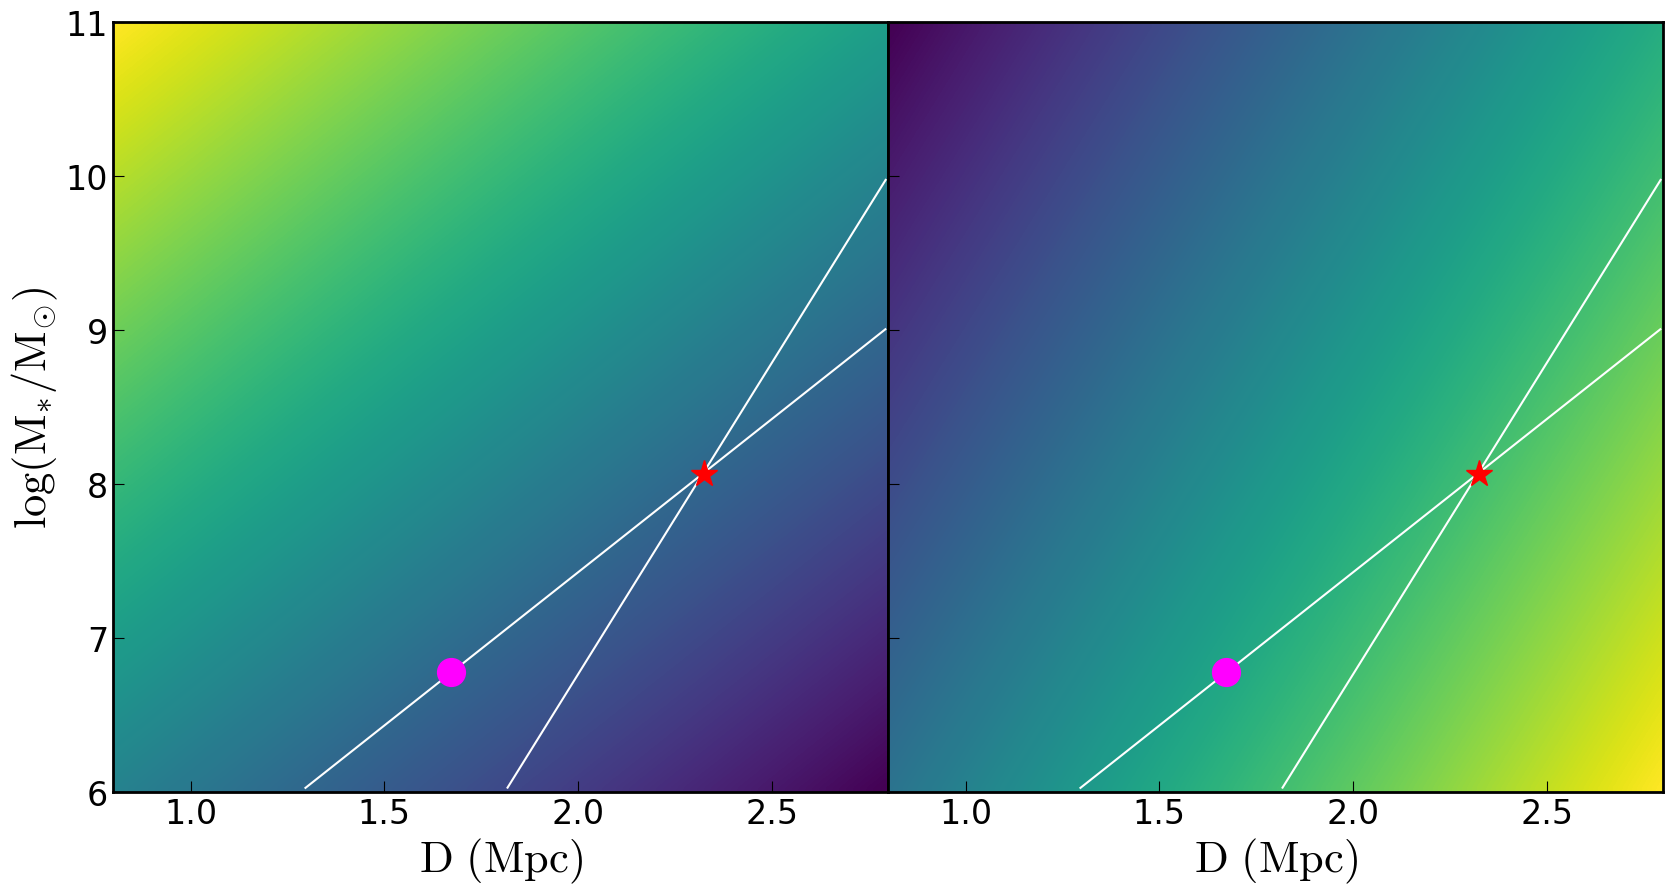

In [16]:
#def sfb_mag_degen(M,g_i,Re): return abs_mag(M,g_i) +10 + 2.5*np.log10(np.pi*rd2deg*rd2deg)+5*Re

fig,ax=plt.subplots(1,2,figsize=(20,10),sharey=True)

sfb_arr = np.zeros((2,200,100))
mst_arr = np.linspace(6,11,100)
D_arr = np.linspace(0.8,2.8,200)

lsbg_id=npr.choice(avail)

for j in range(100):
    for i in range(200):
                sfb_arr[0,i,j] = app_mag(mst_arr[j],g_r[lsbg_id],D_arr[i])

                sfb_arr[1,i,j] = np.log10(rd2deg)-D_arr[i] + Re(mst_arr[j])-6

a = np.array([[-2.5,5], [rho[1],-1]])
b = np.array([rmag[lsbg_id] - 2.5*gamma[1]*g_r[lsbg_id]-2.5*gamma[0]-Mr_sol-25, np.log10(reffr[lsbg_id])+6-np.log10(rd2deg)-rho[0]])
x = np.linalg.solve(a, b)
print(x)

im = ax[0].imshow(np.transpose(sfb_arr[0,:,:]),cmap='viridis_r',aspect='auto',extent = [0.8,2.8,6,11],origin='lower',interpolation='gaussian')
ax[0].contour(np.transpose(sfb_arr[0,:,:]), levels=[rmag[lsbg_id]],lw=4,ls='--', colors='white',aspect='auto',extent = [0.8,2.8,6,11],origin='lower')
ax[1].contour(np.transpose(sfb_arr[0,:,:]), levels=[rmag[lsbg_id]],lw=4,ls='-.', colors='white',aspect='auto',extent = [0.8,2.8,6,11],origin='lower')


im = ax[1].imshow(np.transpose(sfb_arr[1,:,:]),cmap='viridis_r',aspect='auto',extent = [0.8,2.8,6,11],origin='lower',interpolation='gaussian')
ax[0].contour(np.transpose(sfb_arr[1,:,:]), levels=[np.log10(reffr[lsbg_id])],lw=4,ls='--', colors='white',aspect='auto',extent = [0.8,2.8,6,11],origin='lower')
ax[1].contour(np.transpose(sfb_arr[1,:,:]), levels=[np.log10(reffr[lsbg_id])],lw=4,ls='-.', colors='white',aspect='auto',extent = [0.8,2.8,6,11],origin='lower')


ax[0].plot(x[1],x[0],marker='*',color='red',markersize=20)
ax[1].plot(x[1],x[0], marker='*',color='red',markersize=20)

ax[0].plot(dst[lsbg_id],mst[lsbg_id],marker='o',color='fuchsia',markersize=20)
ax[1].plot(dst[lsbg_id],mst[lsbg_id], marker='o',color='fuchsia',markersize=20)

ax[0].set_xlabel(r'$D\ (Mpc)$',fontsize=32)
ax[1].set_xlabel(r'$D\ (Mpc)$',fontsize=32)
ax[0].set_ylabel(r'$log(M_{\ast}/M_{\odot})$',fontsize=32)

plt.subplots_adjust(wspace=0.0)


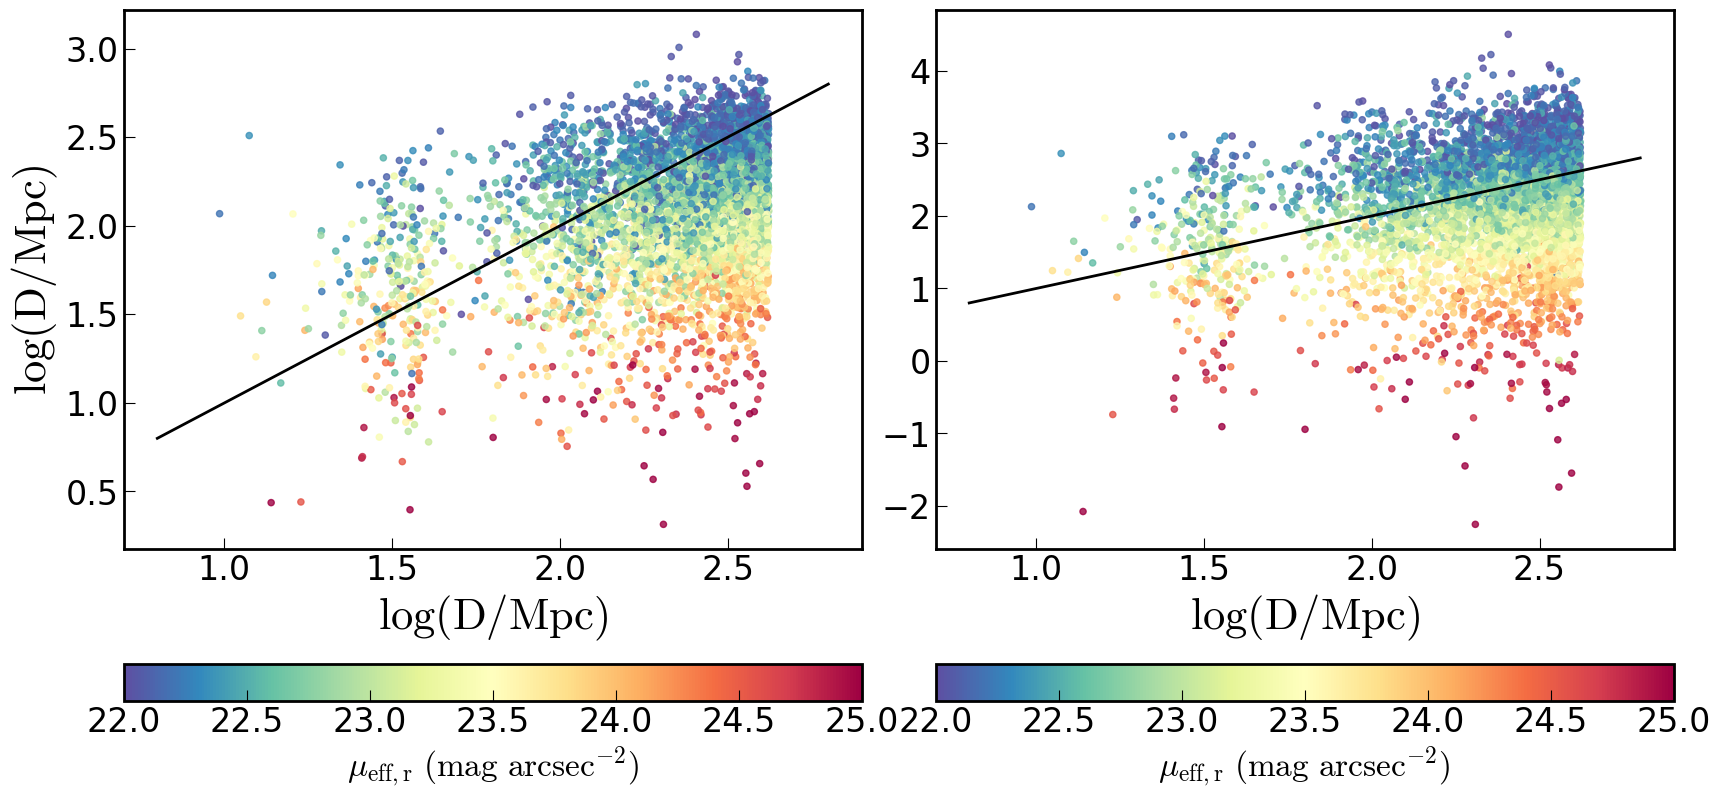

In [37]:
fig,ax=plt.subplots(1,2,figsize=(20,10))

rho_arr = [[0.665,0.296],[-0.23566,0.40928]]

lsbg_solve = np.zeros((len(avail),2))
D_arr = np.linspace(0.8,2.8,100)

for j in range(2):
    n=0
    for k in avail:
        a = np.array([[-2.5,5], [rho_arr[j][1],-1]])
        b = np.array([rmag[k] - 2.5*gamma[1]*g_r[k]-2.5*gamma[0]-Mr_sol-25, np.log10(reffr[k])+6-np.log10(rd2deg)-rho_arr[j][0]])
        
        x = np.linalg.solve(a, b)
        lsbg_solve[n,:] = x[0],x[1]
        n+=1
        
    ax[j].scatter(dst[avail],lsbg_solve[:,1],alpha=0.8,s=20,c=sfbr[avail],cmap=mcm.Spectral_r,vmin=22,vmax=25)

    ax[j].plot(D_arr,D_arr,lw=2,color='black')

    #ax[j].set_xlim((5,500))
    #ax[j].set_xscale('log')
    #ax[j].set_yscale('log')
    ax[j].set_xlabel(r'$log(D/Mpc)$',fontsize=32)
ax[0].set_ylabel(r'$log(D/Mpc)$',fontsize=32)

plt.colorbar(mcm.ScalarMappable(norm=mcol.Normalize(vmin=22,vmax=25), cmap=mcm.Spectral_r), ax=ax[0],orientation='horizontal',label=r'$\mu_{eff,r} \ (mag \ arcsec^{-2})$')
plt.colorbar(mcm.ScalarMappable(norm=mcol.Normalize(vmin=22,vmax=25), cmap=mcm.Spectral_r), ax=ax[1],orientation='horizontal',label=r'$\mu_{eff,r} \ (mag \ arcsec^{-2})$')

plt.subplots_adjust(wspace=0.1)

#plt.savefig('mass_distance.pdf',bbox_inches='tight')

In [38]:
def linear(X,A): return A[0]+A[1]*X[0]+A[2]*X[1]

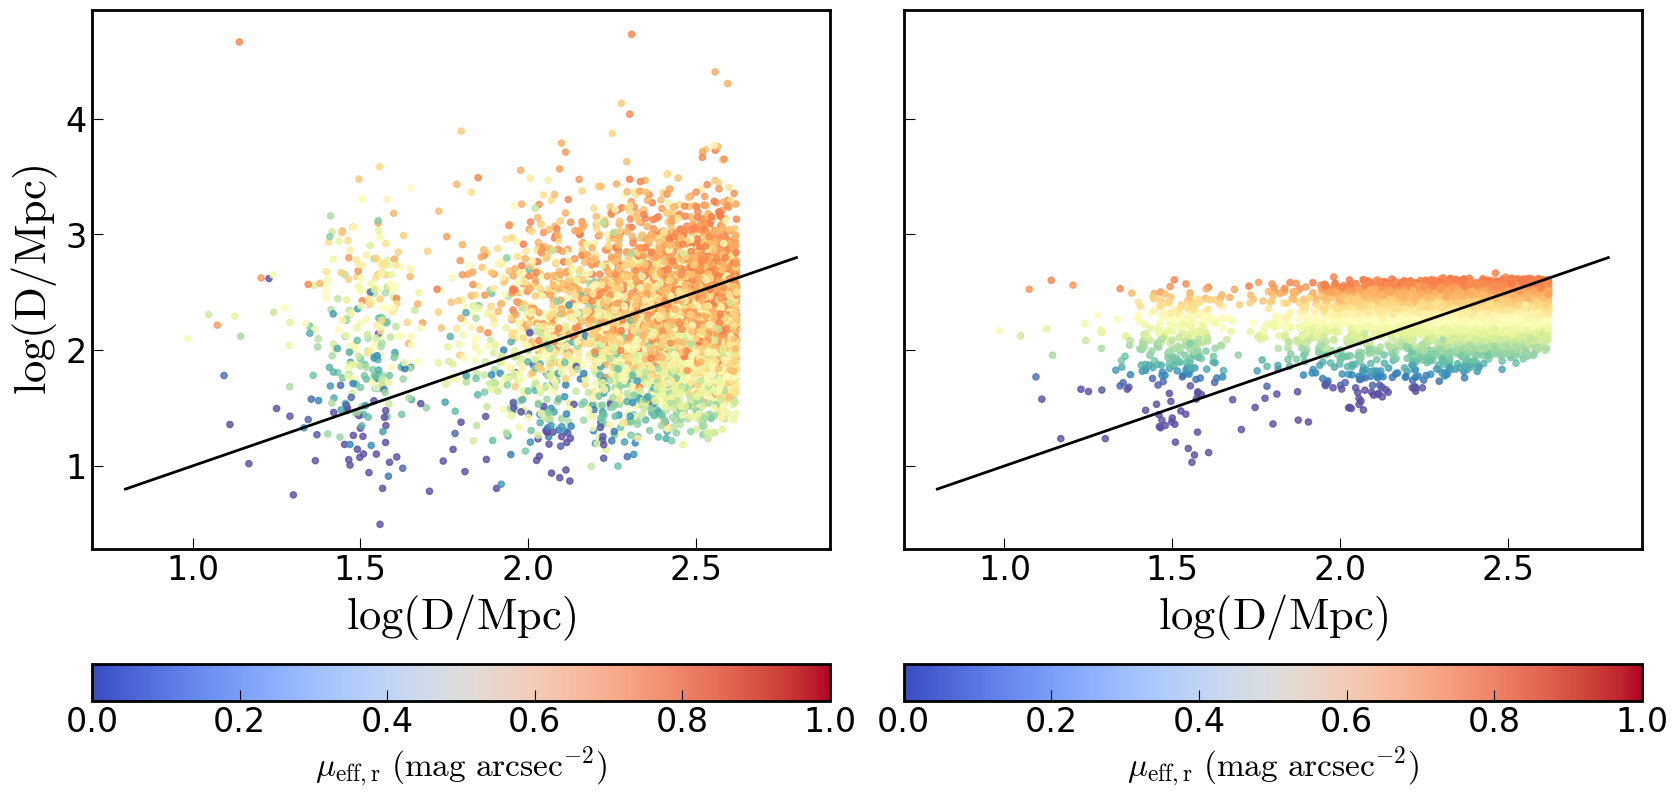

In [40]:
fig,ax=plt.subplots(1,2,figsize=(20,10),sharey=True)

rho_arr = [[0.665,0.296],[-0.1550, 0.3996]]

lsbg_solve = np.zeros((len(avail),2))
D_arr = np.linspace(0.8,2.8,100)

for j in range(2):
    n=0
    for k in avail:
        a = np.array([[-2.5,5], [rho_arr[j][1],-1]])
        b = np.array([rmag[k] - 2.5*gamma[1]*g_r[k]-2.5*gamma[0]-Mr_sol-25, np.log10(reffr[k])+6-np.log10(rd2deg)-rho_arr[j][0]])
        
        x = np.linalg.solve(a, b)
        lsbg_solve[n,:] = x[0],x[1]
        n+=1

    lsbg_solve[:,1]-=p1[0]+p1[1]*sfbr[avail]+p1[2]*g_r[avail]
    ax[j].scatter(dst[avail],lsbg_solve[:,1],alpha=0.8,s=20,c=rmag[avail],cmap=mcm.Spectral_r,vmin=16,vmax=22)

    ax[j].plot(D_arr,D_arr,lw=2,color='black')

    #ax[j].set_xlim((5,500))
    #ax[j].set_xscale('log')
    #ax[j].set_yscale('log')
    ax[j].set_xlabel(r'$log(D/Mpc)$',fontsize=32)
ax[0].set_ylabel(r'$log(D/Mpc)$',fontsize=32)

plt.colorbar(mcm.ScalarMappable(norm=mcol.Normalize(vmin=0,vmax=1), cmap=mcm.coolwarm), ax=ax[0],orientation='horizontal',label=r'$\mu_{eff,r} \ (mag \ arcsec^{-2})$')
plt.colorbar(mcm.ScalarMappable(norm=mcol.Normalize(vmin=0,vmax=1), cmap=mcm.coolwarm), ax=ax[1],orientation='horizontal',label=r'$\mu_{eff,r} \ (mag \ arcsec^{-2})$')

plt.subplots_adjust(wspace=0.1)

#plt.savefig('mass_distance.pdf',bbox_inches='tight')